Install dependencies



In [47]:
!pip install mediapipe colour matplotlib opencv-python

In [2]:
import mediapipe as mp
import cv2
import numpy as np
import uuid
import os
from matplotlib import pyplot as plt

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [ ]:
# displays bone connections
mp_hands.HAND_CONNECTIONS

Output images

Creates folder for images

In [4]:
os.mkdir('Output images') # creates a folder for the output images

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Output images'

creates label definition for hand tracking

In [5]:
def get_label(index, hand, results):
    output = None
    # if left hand
    if index == 0:
        label = results.multi_handedness[0].classification[0].label
        score = results.multi_handedness[0].classification[0].score
        coords = tuple(np.multiply(
                        np.array((hand.landmark[mp_hands.HandLandmark.WRIST].x, hand.landmark[mp_hands.HandLandmark.WRIST].y)),
                        [640,480]).astype(int))

        output = label, coords
        return output
    
    # if right hand
    if index == 1:
        label = results.multi_handedness[1].classification[0].label
        score = results.multi_handedness[1].classification[0].score
        coords = tuple(np.multiply(
                        np.array((hand.landmark[mp_hands.HandLandmark.WRIST].x, hand.landmark[mp_hands.HandLandmark.WRIST].y)),
                        [640,480]).astype(int))

        output = label, coords
        return output

Draw image

Definitions

In [6]:
def mp_detection(image):
   # recolours frame from default BGR -> RGB
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        # flips image so hands correct
        image = cv2.flip(image,1)
        # set flag
        image.flags.writeable = False
        # detect hands
        results = hands.process(image)
        # sets flag back to true
        image.flags.writeable = True
        # recolours back to BGR
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        return image,results

In [7]:
def draw_landmarks(image, hand):
    mp_drawing.draw_landmarks(image,hand,
    mp_hands.HAND_CONNECTIONS,
    mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=5),
    mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=8),)

In [18]:
cv2.destroyAllWindows()
cap = cv2.VideoCapture(0) # get video from webcam
# instantiate a mediapipe model 
# passed in variables are for initial accuracy and tracking accuracy, limit number of hands
with mp_hands.Hands(min_detection_confidence=0.8,min_tracking_confidence=0.5, max_num_hands=4) as hands: 
    while cap.isOpened():
        ret, frame = cap.read() # get the frame from the webcam
        # make detections
        image, results = mp_detection(frame)
        print(results)
        
        # draw the results
        # checks if there are any results within the results array
        if results.multi_hand_landmarks:
            # draws landmarks on the frame
            for num, hand in enumerate(results.multi_hand_landmarks):
                
                draw_landmarks(image, hand) # draws the landmarks passing in enumerated hand and image
               

            # render left or right detection
                if get_label(num,hand,results):
                    # display text on screen with coordinates
                    text, coord= get_label(num,hand,results)
                    cv2.putText(image,text,coord,cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # saves the image
        #cv2.imwrite(os.path.join('Output images', # writes the image to the output images folder '{}.jpg'.format(uuid.uuid1())), image # gives the image a unique identifier )
        cv2.imshow('Tracking', image) # display the frame
       
                
        if cv2.waitKey(25) & 0xFF == ord('r'): # key for closing webcam frame
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
################################################################
capture = cv2.VideoCapture(0) # get video from webcam
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while capture.isOpened():
                # read camera feed
                ret, frame = capture.read()

                # make detections
                image, results = detection(frame, holistic) # passing in the feed alongside the model

                # draw landmarks
                draw_landmarks(image,results)
                
                # display camera feed
                cv2.imshow('camera feed', image)
                
                # press q to quit
                if cv2.waitKey(25) & 0xFF == ord('r'): # key for closing webcam frame
                        break

        capture.release()
        cv2.destroyAllWindows()

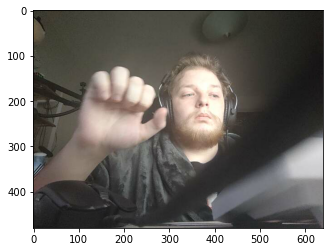

In [81]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Bounding box(unused currently)

In [82]:
def get_bbox_coordinates(handLandmark):
    all_x, all_y = [], []   # x and y coordinates of all points
    for hnd in mp_hands.HandLandmark:
        all_x.append(int(handLandmark.landmark[hnd].x*640))
        all_y.append(int(handLandmark.landmark[hnd].x*480))

    return min(all_x), min(all_y), max(all_x), max(all_y) # returns the bounding box coordinates


Key points


In [17]:
arr = []
for res in results.multi_hand_landmarks:
    test = np.array([hand.landmark[mp_hands.HandLandmark.WRIST].x, hand.landmark[mp_hands.HandLandmark.WRIST].y])
    arr.append(test)

In [18]:
arr = np.array([([hand.landmark[mp_hands.HandLandmark.WRIST].x, hand.landmark[mp_hands.HandLandmark.WRIST].y]) for res in results.multi_hand_landmarks]).flatten()

In [ ]:
#np.array([hand.landmark[mp_hands.Hands..HandLandmark.WRIST].x, hand.landmark[mp_hands.HandLandmark.WRIST].y]).flatten()

Folders for data collection

In [92]:
# path for exported data
path=os.path.join('data set')

# actions to be detected
actions=np.array(['okay','point'])
# number of videos
no_sequence=10
# length of frames
sequence_length=30


In [93]:
for act in actions:
    for sequence in range(no_sequence):
        # create a folder for each action, if the folder already exists then pass
        try:
            os.makedirs(os.path.join(path, act, str(sequence)))
        except:
            pass

Collect keypoint data for DL training


In [95]:
cv2.destroyAllWindows()
cap = cv2.VideoCapture(0) # get video from webcam
# instantiate a mediapipe model 
# passed in variables are for initial accuracy and tracking accuracy, limit number of hands
with mp_hands.Hands(min_detection_confidence=0.8,min_tracking_confidence=0.5, max_num_hands=4) as hands: 
    # loop through each action
    for act in actions:
        # loop through each sequence
        for sequence in range(no_sequence):
            for frame_num in range(sequence_length):

                #read feed
                ret, frame = cap.read() # get the frame from the webcam
                # make detections
                image, results = mp_detection(frame)
                print(results)
                
                # draw the results
                # checks if there are any results within the results array
                if results.multi_hand_landmarks:
                    # draws landmarks on the frame
                    for num, hand in enumerate(results.multi_hand_landmarks):
                        draw_landmarks(image, hand) # draws the landmarks passing in enumerated hand and image
                    

                    # render left or right detection
                        if get_label(num,hand,results):
                            # display text on screen with coordinates
                            text, coord= get_label(num,hand,results)
                            cv2.putText(image,text,coord,cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2,cv2.LINE_AA)
                # saves the image
                #cv2.imwrite(os.path.join('Output images', # writes the image to the output images folder '{}.jpg'.format(uuid.uuid1())), image # gives the image a unique identifier )
                cv2.imshow('Tracking', image) # display the frame
            
                        
        if cv2.waitKey(25) & 0xFF == ord('r'): # key for closing webcam frame
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [19]:
arr

array([0.73453355, 0.59629887])

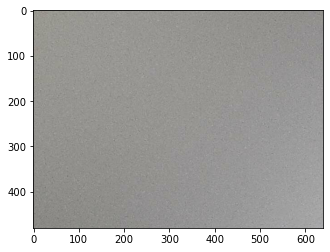

In [96]:
cv2.destroyAllWindows{}

In [ ]:
cv2.imwrite(os.path.join('Output images', '{}.jpg'.format(uuid.uuid1())), image)